In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer
import math

EDA

In [2]:
data_original = pd.read_csv('Assets/Data/welddb.csv', delimiter='\s+', header=None)

In [3]:
data = data_original.copy()

# Name the columns
data.columns = [
    'Carbon concentration (weight%)', 
    'Silicon concentration (weight%)', 
    'Manganese concentration (weight%)', 
    'Sulphur concentration (weight%)', 
    'Phosphorus concentration (weight%)', 
    'Nickel concentration (weight%)', 
    'Chromium concentration (weight%)', 
    'Molybdenum concentration (weight%)', 
    'Vanadium concentration (weight%)', 
    'Copper concentration (weight%)', 
    'Cobalt concentration (weight%)', 
    'Tungsten concentration (weight%)', 
    'Oxygen concentration (ppm by weight)', 
    'Titanium concentration (ppm by weight)', 
    'Nitrogen concentration (ppm by weight)', 
    'Aluminium concentration (ppm by weight)', 
    'Boron concentration (ppm by weight)', 
    'Niobium concentration (ppm by weight)', 
    'Tin concentration (ppm by weight)', 
    'Arsenic concentration (ppm by weight)', 
    'Antimony concentration (ppm by weight)', 
    'Current (A)', 
    'Voltage (V)', 
    'AC or DC', 
    'Electrode positive or negative', 
    'Heat input (kJ/mm)', 
    'Interpass temperature (°C)', 
    'Type of weld', 
    'Post weld heat treatment temperature (°C)', 
    'Post weld heat treatment time (hours)', 
    'Yield strength (MPa)', 
    'Ultimate tensile strength (MPa)', 
    'Elongation (%)', 
    'Reduction of Area (%)', 
    'Charpy temperature (°C)', 
    'Charpy impact toughness (J)', 
    'Hardness (kg/mm2)', 
    '50% FATT', 
    'Primary ferrite in microstructure (%)', 
    'Ferrite with second phase (%)', 
    'Acicular ferrite (%)', 
    'Martensite (%)', 
    'Ferrite with carbide aggregate (%)', 
    'Weld ID'
]

data

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (°C),Charpy impact toughness (J),Hardness (kg/mm2),50% FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX35
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX36
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX37
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX38


In [4]:
# Definindo as categorias
categories = {
    'Concentration of Elements': [
        'Carbon concentration (weight%)', 
        'Silicon concentration (weight%)', 
        'Manganese concentration (weight%)', 
        'Sulphur concentration (weight%)', 
        'Phosphorus concentration (weight%)', 
        'Nickel concentration (weight%)', 
        'Chromium concentration (weight%)', 
        'Molybdenum concentration (weight%)', 
        'Vanadium concentration (weight%)', 
        'Copper concentration (weight%)', 
        'Cobalt concentration (weight%)', 
        'Tungsten concentration (weight%)', 
        'Oxygen concentration (ppm by weight)', 
        'Titanium concentration (ppm by weight)', 
        'Nitrogen concentration (ppm by weight)', 
        'Aluminium concentration (ppm by weight)', 
        'Boron concentration (ppm by weight)', 
        'Niobium concentration (ppm by weight)', 
        'Tin concentration (ppm by weight)', 
        'Arsenic concentration (ppm by weight)', 
        'Antimony concentration (ppm by weight)'
    ],
    'Electrical and Welding Parameters': [
        'Current (A)', 
        'Voltage (V)', 
        'AC or DC', 
        'Electrode positive or negative', 
        'Heat input (kJ/mm)', 
        'Interpass temperature (°C)', 
        'Type of weld', 
        'Post weld heat treatment temperature (°C)', 
        'Post weld heat treatment time (hours)'
    ],
    'Mechanical Properties': [
        'Yield strength (MPa)', 
        'Ultimate tensile strength (MPa)', 
        'Elongation (%)', 
        'Reduction of Area (%)', 
        'Charpy temperature (°C)', 
        'Charpy impact toughness (J)', 
        'Hardness (kg/mm2)', 
        '50% FATT'
    ],
    'Microstructural Properties': [
        'Primary ferrite in microstructure (%)', 
        'Ferrite with second phase (%)', 
        'Acicular ferrite (%)', 
        'Martensite (%)', 
        'Ferrite with carbide aggregate (%)'
    ],
    'Identification': ['Weld ID']
}


Tratar os dados Faltantes como Nan e transformar todas as colunas exceto as 4 que sao categoricas em numericas

In [5]:
data_clean = data.replace({"N": np.nan})
categoric_features = ['AC or DC', 'Electrode positive or negative', 'Type of weld']  # Weld ID isn't important
# Convert columns to numeric
numeric_features = data_clean.drop(columns=['Weld ID', 'AC or DC', 'Electrode positive or negative', 'Type of weld']).columns
data_clean[numeric_features] = data_clean[numeric_features].apply(pd.to_numeric, errors='coerce')

Analisar a distribuicao dos dados

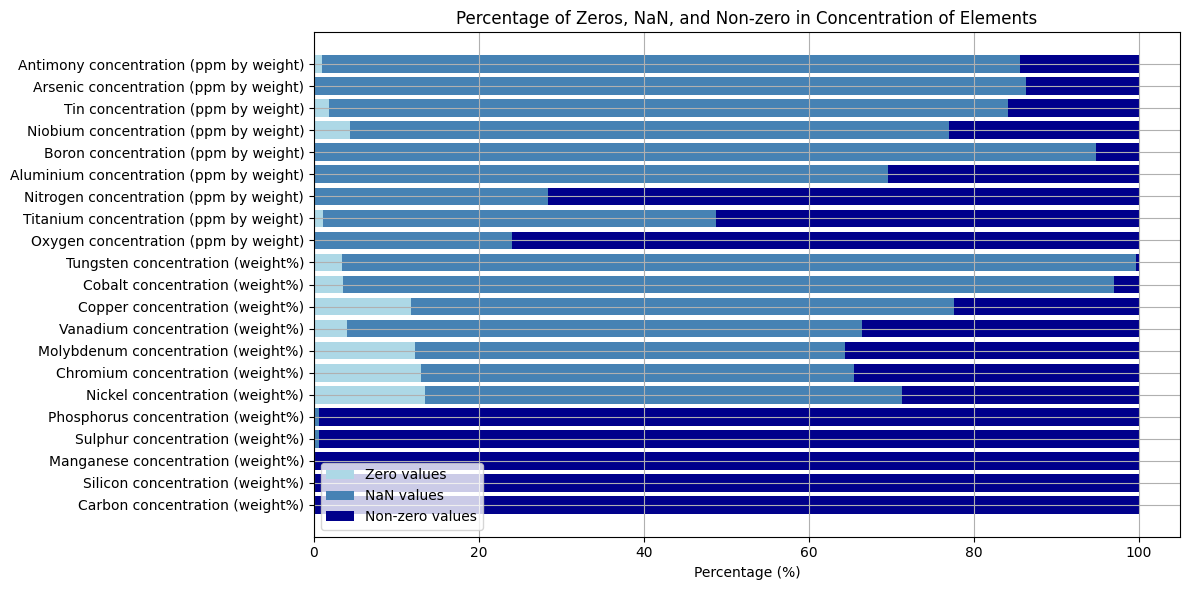

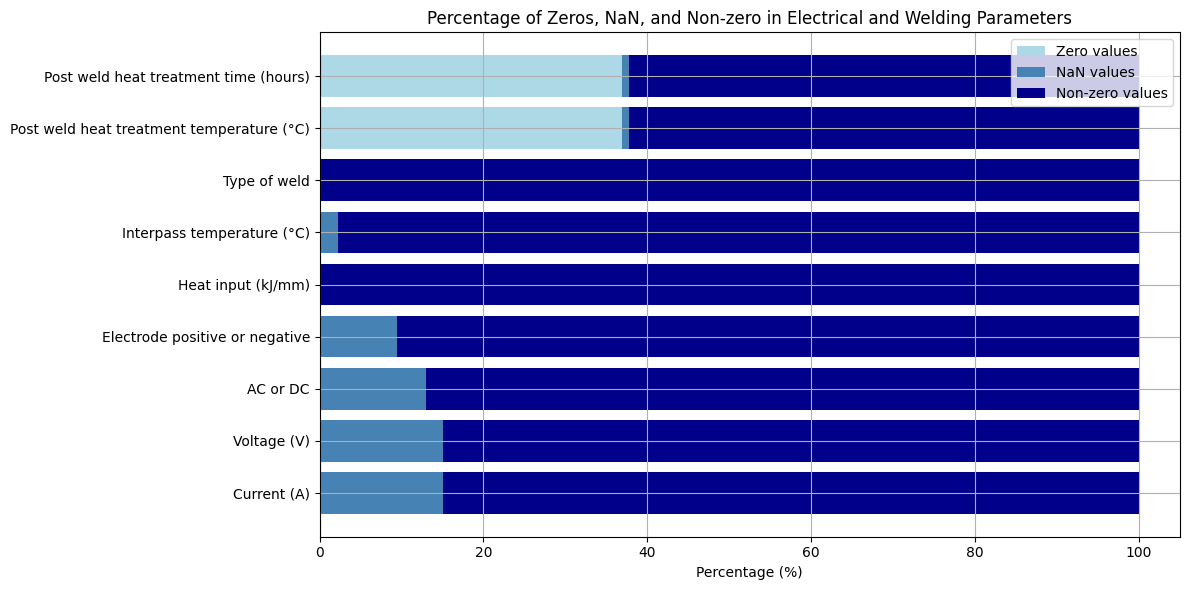

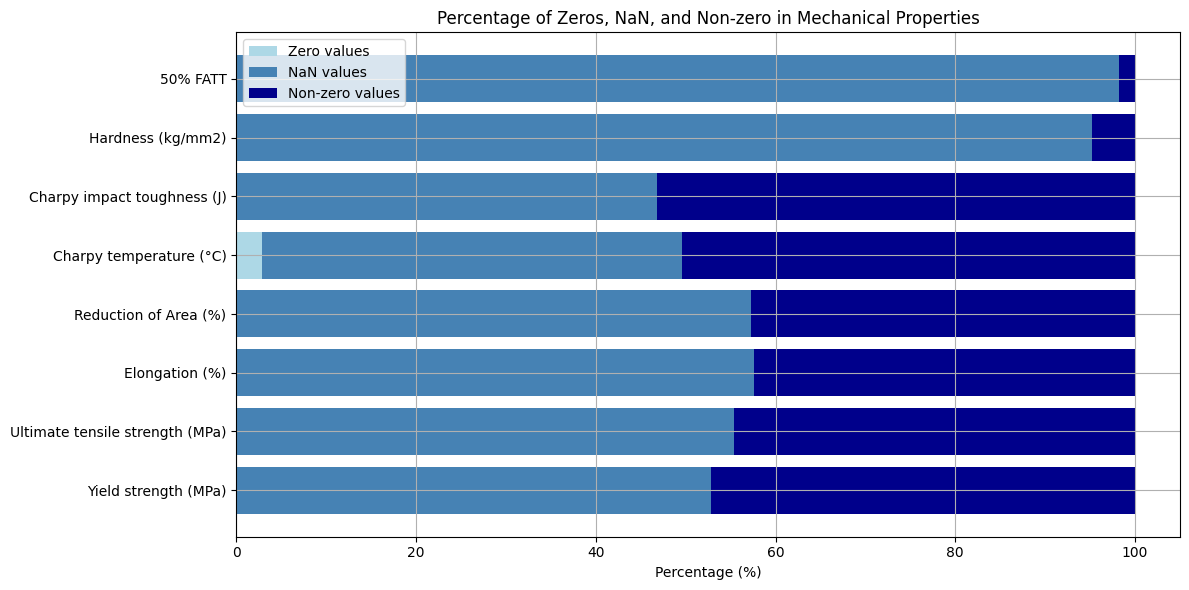

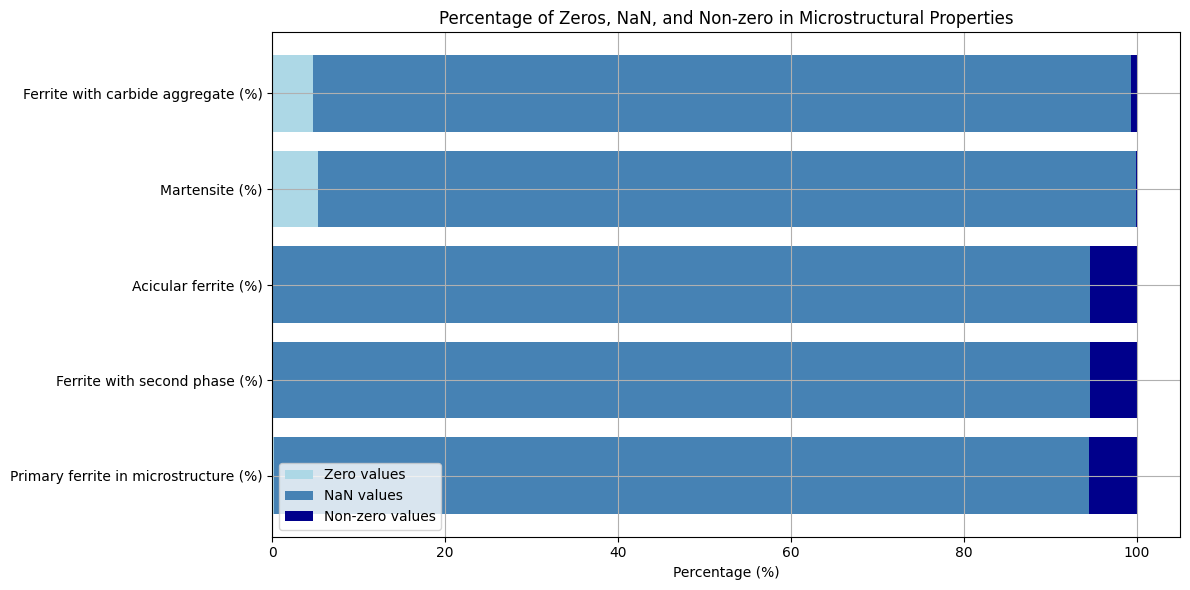

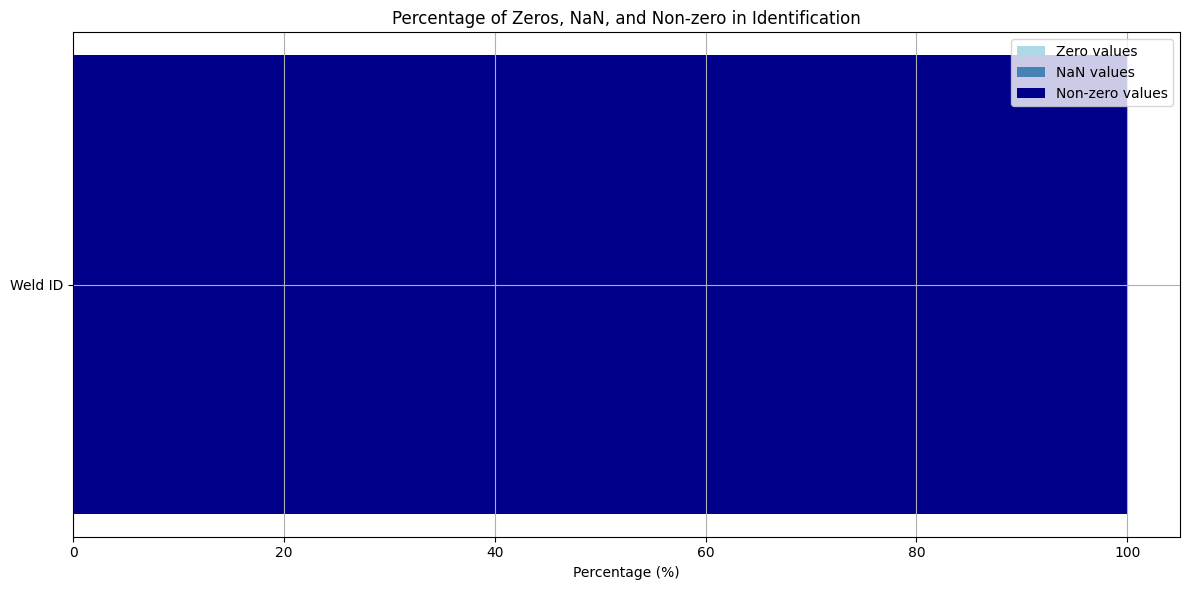

In [6]:
# Função para calcular e plotar a porcentagem de zeros, NaN e valores diferentes de zero
def plot_zeros_nan_and_non_zero_percentage(df, categories):
    for category, columns in categories.items():
        zero_percentage = {}
        nan_percentage = {}
        non_zero_percentage = {}
        for column in columns:
            # Calcular a porcentagem de zeros
            zero_percentage[column] = (df[column] == 0).mean() * 100
            # Calcular a porcentagem de NaN
            nan_percentage[column] = df[column].isna().mean() * 100
            # Calcular a porcentagem de valores diferentes de zero e não NaN
            non_zero_percentage[column] = 100 - zero_percentage[column] - nan_percentage[column]

        # Criar gráfico de barras empilhadas
        plt.figure(figsize=(12, 6))
        cols = list(zero_percentage.keys())
        zeros_vals = list(zero_percentage.values())
        nan_vals = list(nan_percentage.values())
        non_zero_vals = list(non_zero_percentage.values())

        # Posição das barras
        indices = np.arange(len(cols))

        # Plotar as barras horizontais empilhadas com uma paleta azul
        plt.barh(indices, zeros_vals, color='#add8e6', label='Zero values')  # Azul claro
        plt.barh(indices, nan_vals, left=zeros_vals, color='#4682b4', label='NaN values')  # Azul aço
        plt.barh(indices, non_zero_vals, left=[i + j for i, j in zip(zeros_vals, nan_vals)], color='#00008b', label='Non-zero values')  # Azul escuro

        # Configurações do gráfico
        plt.yticks(indices, cols)  # Rótulos nas barras
        plt.xlabel('Percentage (%)')
        plt.title(f'Percentage of Zeros, NaN, and Non-zero in {category}')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Chamar a função para plotar os gráficos para cada categoria
plot_zeros_nan_and_non_zero_percentage(data_clean, categories)


- The presence of an ``N'' indicates that the value was not reported in the publication. This is NOT meant to be an indication that the value is zero.

- It wouldn't make sense to set the phosphorus and sulfur concentrations to zero when their values aren't reported, because these impurity elements are inevitably present in welds in practice. 
    -   Therefore, we'll use the average values for these concentrations in such cases. 
    -   On the other hand, for other elements like manganese and nickel, it is reasonable to set their concentrations to zero if they are not reported. This is because they wouldn't be deliberate additions and their concentrations would be close to the detection limits of the commonly used analytical techniques [1].

In [7]:
# 1. Usar os valores médios para as concentrações de Phosphorus e Sulphur onde houver valores ausentes
data_clean["Phosphorus concentration (weight%)"] = data_clean["Phosphorus concentration (weight%)"].fillna(
    data_clean["Phosphorus concentration (weight%)"].mean())

data_clean["Sulphur concentration (weight%)"] = data_clean["Sulphur concentration (weight%)"].fillna(
    data_clean["Sulphur concentration (weight%)"].mean())

# 2. Definir as concentrações de Manganese e Nickel para zero onde houver valores ausentes
data_clean["Manganese concentration (weight%)"] = data_clean["Manganese concentration (weight%)"].fillna(0)
data_clean["Nickel concentration (weight%)"] = data_clean["Nickel concentration (weight%)"].fillna(0)


In [8]:
# Definir a porcentagem limite para a remoção de colunas com muitos valores NaN (60%)
threshold = 0.6

# Calcular a porcentagem de valores NaN em cada coluna
nan_percentage = data_clean.isna().mean()

# Selecionar as colunas que possuem mais de 60% de valores NaN
columns_to_drop = nan_percentage[nan_percentage > threshold].index

# Remover essas colunas
data_clean = data_clean.drop(columns=columns_to_drop)

# Exibir o DataFrame sem as colunas que possuem mais de 60% de valores NaN
print(columns_to_drop)

Index(['Vanadium concentration (weight%)', 'Copper concentration (weight%)',
       'Cobalt concentration (weight%)', 'Tungsten concentration (weight%)',
       'Aluminium concentration (ppm by weight)',
       'Boron concentration (ppm by weight)',
       'Niobium concentration (ppm by weight)',
       'Tin concentration (ppm by weight)',
       'Arsenic concentration (ppm by weight)',
       'Antimony concentration (ppm by weight)', 'Hardness (kg/mm2)',
       '50% FATT', 'Primary ferrite in microstructure (%)',
       'Ferrite with second phase (%)', 'Acicular ferrite (%)',
       'Martensite (%)', 'Ferrite with carbide aggregate (%)'],
      dtype='object')


In [9]:
print("Orginal data shape: ", data.shape, "\nCleaned data shape: ",data_clean.shape)

Orginal data shape:  (1652, 44) 
Cleaned data shape:  (1652, 27)


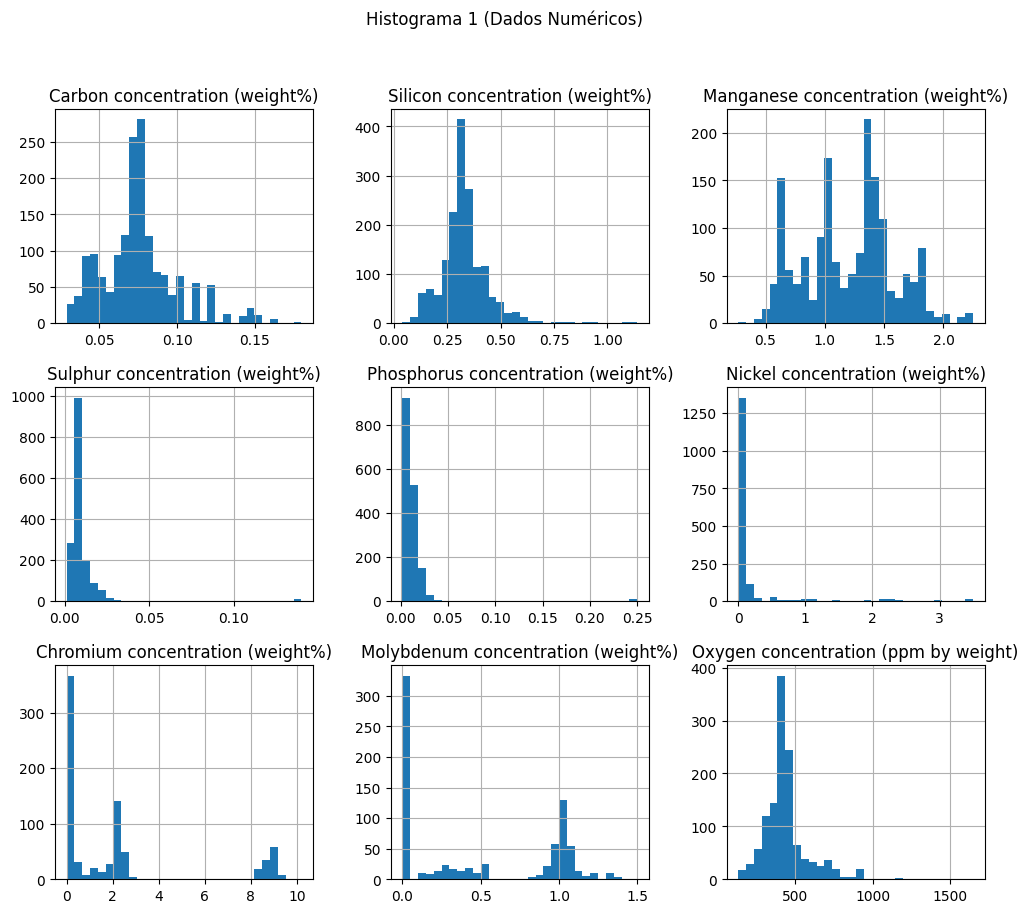

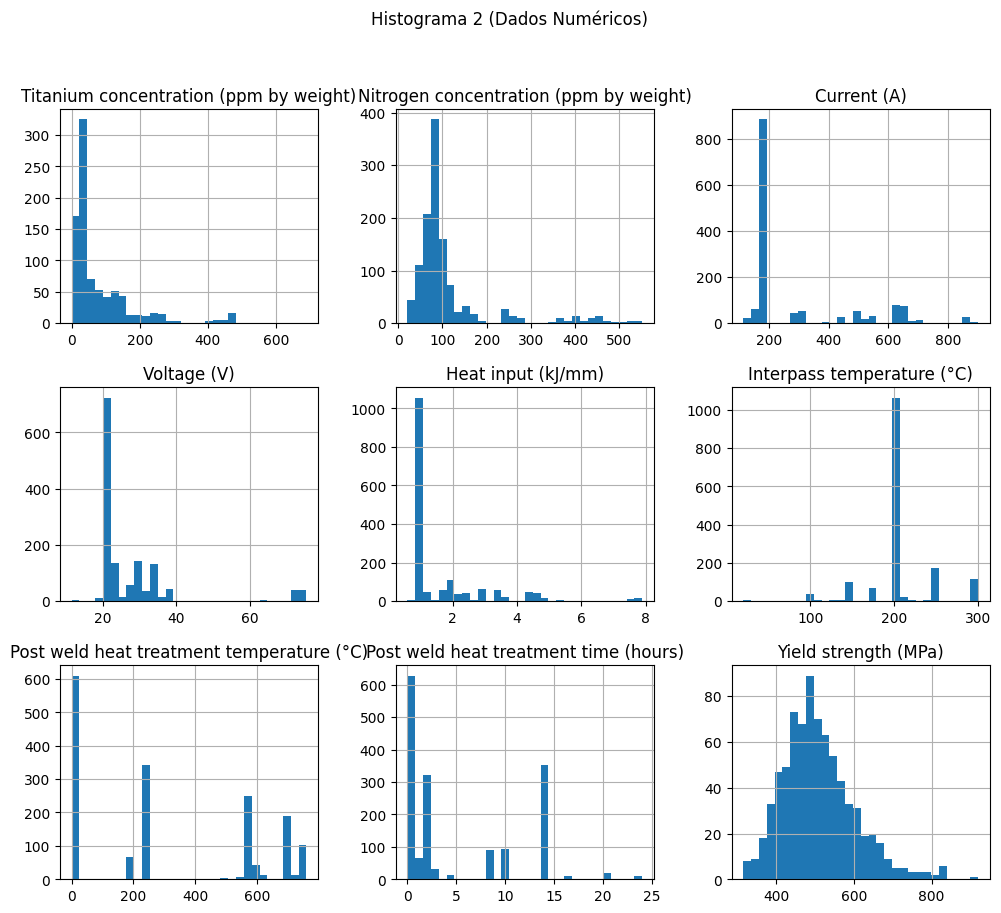

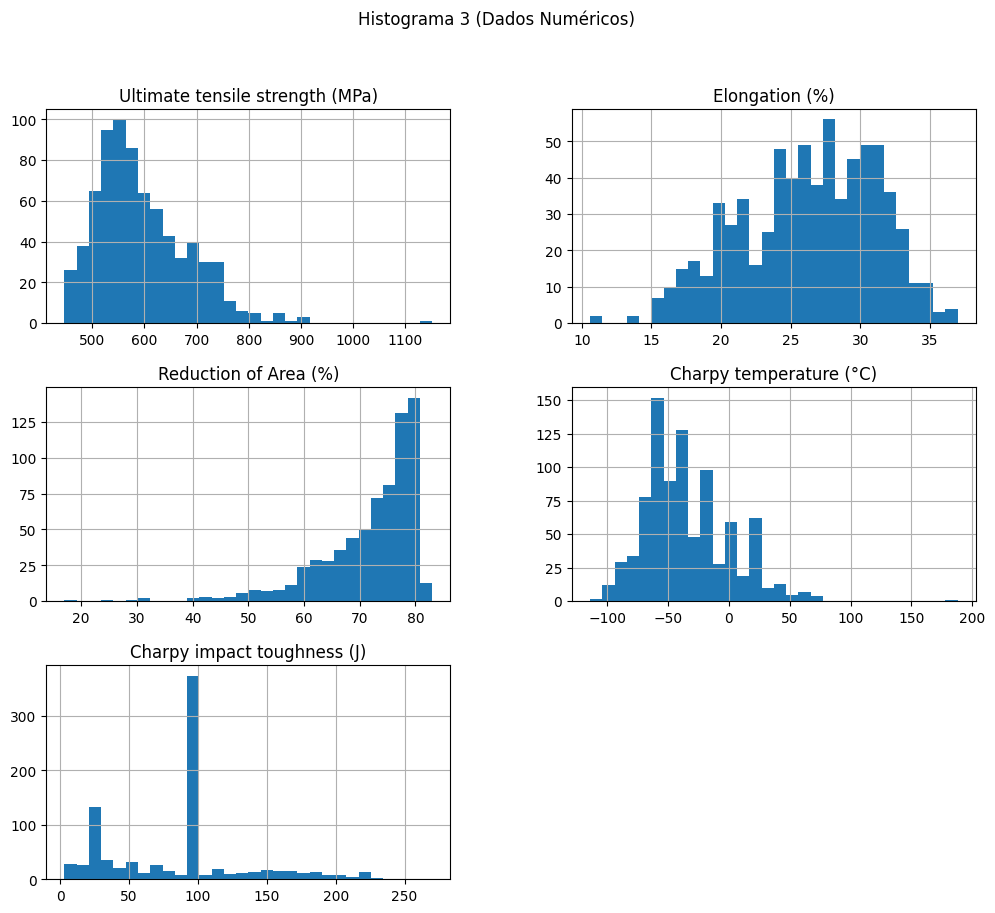

In [10]:
# Seleciona apenas as colunas numéricas
data_numeric = data_clean.select_dtypes(include=[np.number])

# Gerar histogramas em grupos de 3x3
num_columns = len(data_numeric.columns)
cols_per_plot = 3  # Número de colunas por plot
rows_per_plot = 3  # Número de linhas por plot
total_plots = math.ceil(num_columns / (cols_per_plot * rows_per_plot))  # Quantidade de plots necessários

for i in range(total_plots):
    start_col = i * (cols_per_plot * rows_per_plot)
    end_col = start_col + (cols_per_plot * rows_per_plot)
    
    data_subset = data_numeric.iloc[:, start_col:end_col]  # Seleciona um subset das colunas
    
    if not data_subset.empty:
        data_subset.hist(figsize=(12, 10), bins=30)
        plt.suptitle(f"Histograma {i + 1} (Dados Numéricos)")
        plt.show()



Analisar a assimetria (skewness) e a curtose (kurtosis) permite identificar a distribuição dos dados numéricos e potenciais outliers. Se os dados tiverem uma alta assimetria ou curtose, isso pode indicar a necessidade de transformações, como uma transformação logarítmica, para melhorar a modelagem, especialmente em algoritmos sensíveis à distribuição. Assimetria positiva ou negativa revela caudas desbalanceadas, enquanto curtose alta indica a presença de mais outliers do que o esperado. Transformar ou ajustar esses dados pode levar a melhores resultados na modelagem

. Assimetria (Skewness)
Skewness (Assimetria) mede o grau de simetria da distribuição dos dados:
Skewness ≈ 0: A distribuição é aproximadamente simétrica (distribuição normal).
Skewness > 0 (positiva): A distribuição tem uma cauda mais longa à direita (muitos valores pequenos e alguns grandes).
Skewness < 0 (negativa): A distribuição tem uma cauda mais longa à esquerda (muitos valores grandes e alguns pequenos).

Distribuições simétricas (skewness ≈ 0) são geralmente ideais para modelos que assumem normalidade (como regressão linear).
Distribuições assimétricas (skewness > 0 ou < 0) podem indicar que uma transformação dos dados (como logarítmica) pode ser útil para modelagem.

Kurtosis (Curtose) mede o "achatamento" da distribuição dos dados:
Curtose ≈ 3: Indica uma distribuição normal (mesocúrtica).
Curtose > 3 (leptocúrtica): Distribuição com caudas mais pesadas e um pico mais alto, indicando mais valores extremos (outliers).
Curtose < 3 (platicúrtica): Distribuição com caudas mais leves e um pico menos acentuado (distribuição achatada).

Curtose elevada (> 3) indica que os dados têm mais outliers do que o esperado em uma distribuição normal, o que pode exigir atenção na modelagem, pois valores extremos podem influenciar o modelo de forma desproporcional.
Curtose baixa (< 3) sugere que os dados são mais distribuídos em torno da média e têm menos outliers.

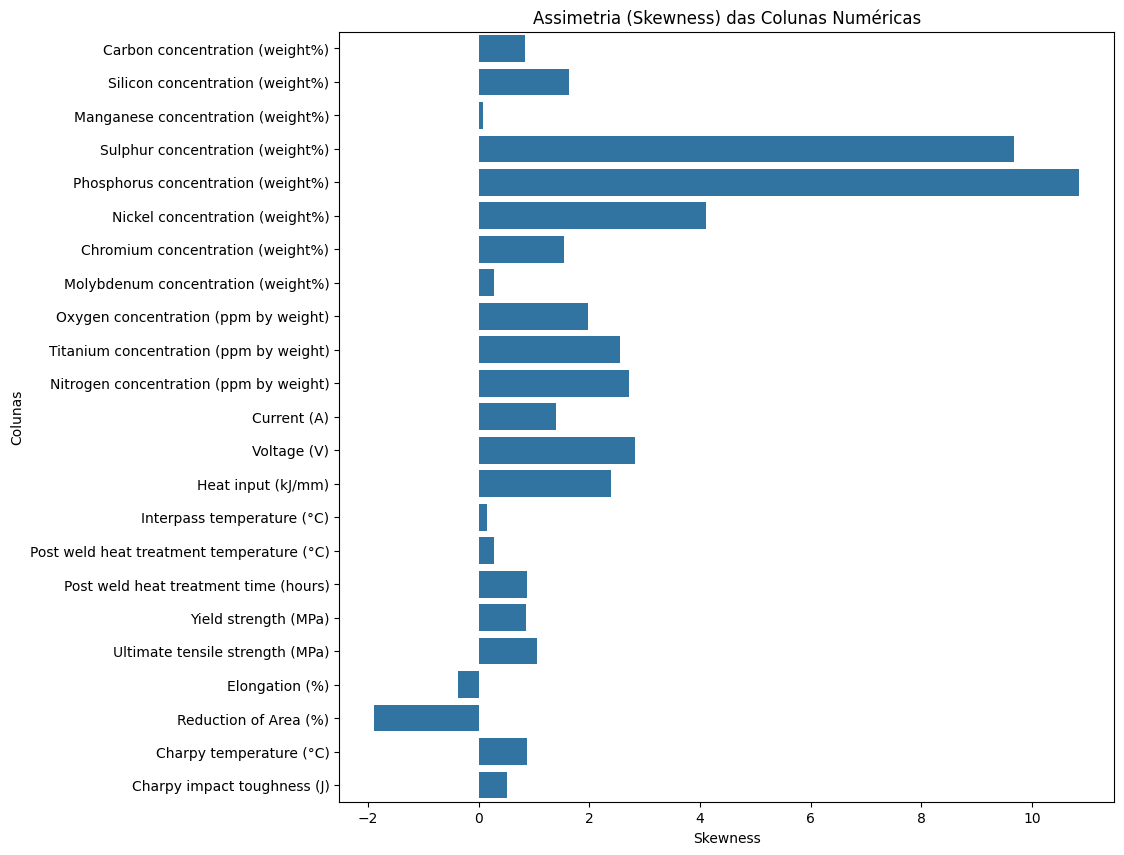

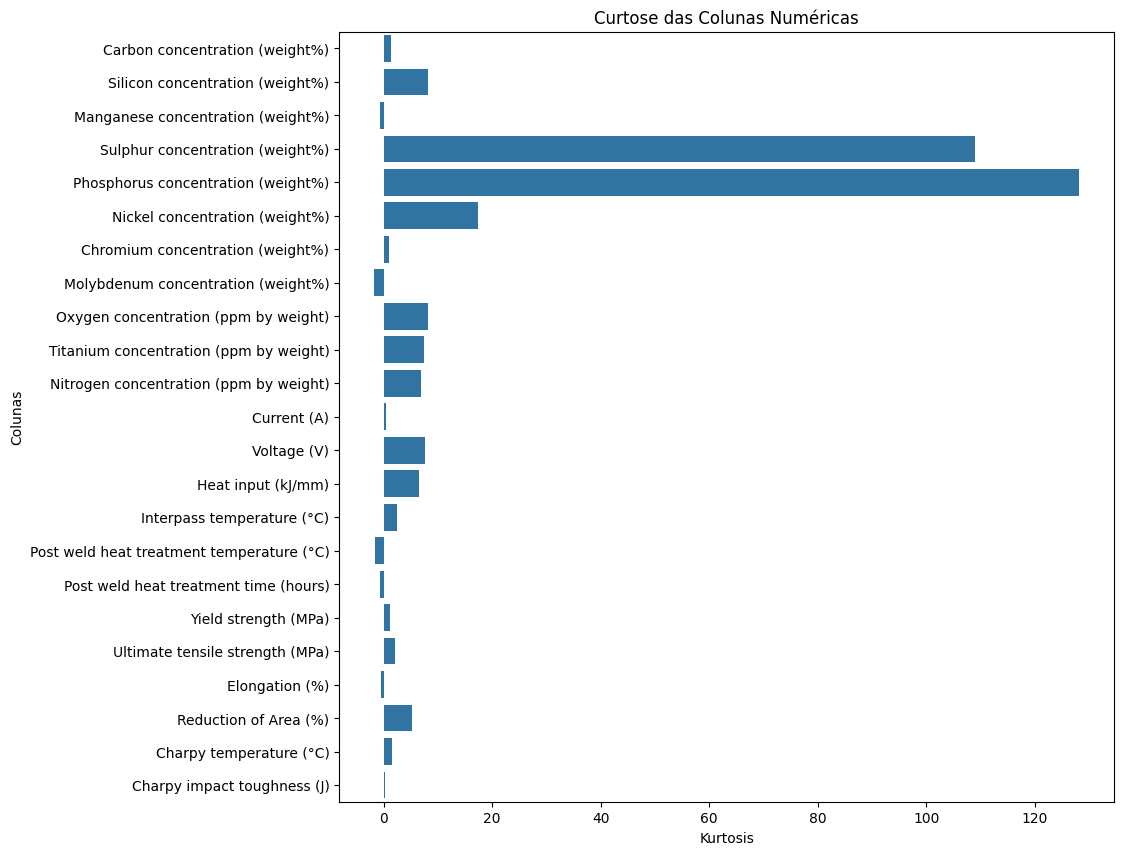

In [11]:
# Análise de Assimetria e Curtose
skewness = data_numeric.skew()
kurtosis = data_numeric.kurt()

# Plotar gráficos de skewness (Assimetria) com barras horizontais
plt.figure(figsize=(10, 10))
sns.barplot(y=skewness.index, x=skewness.values)
plt.title("Assimetria (Skewness) das Colunas Numéricas")
plt.xlabel("Skewness")
plt.ylabel("Colunas")
plt.show()

# Plotar gráficos de kurtosis (Curtose) com barras horizontais
plt.figure(figsize=(10, 10))
sns.barplot(y=kurtosis.index, x=kurtosis.values)
plt.title("Curtose das Colunas Numéricas")
plt.xlabel("Kurtosis")
plt.ylabel("Colunas")
plt.show()

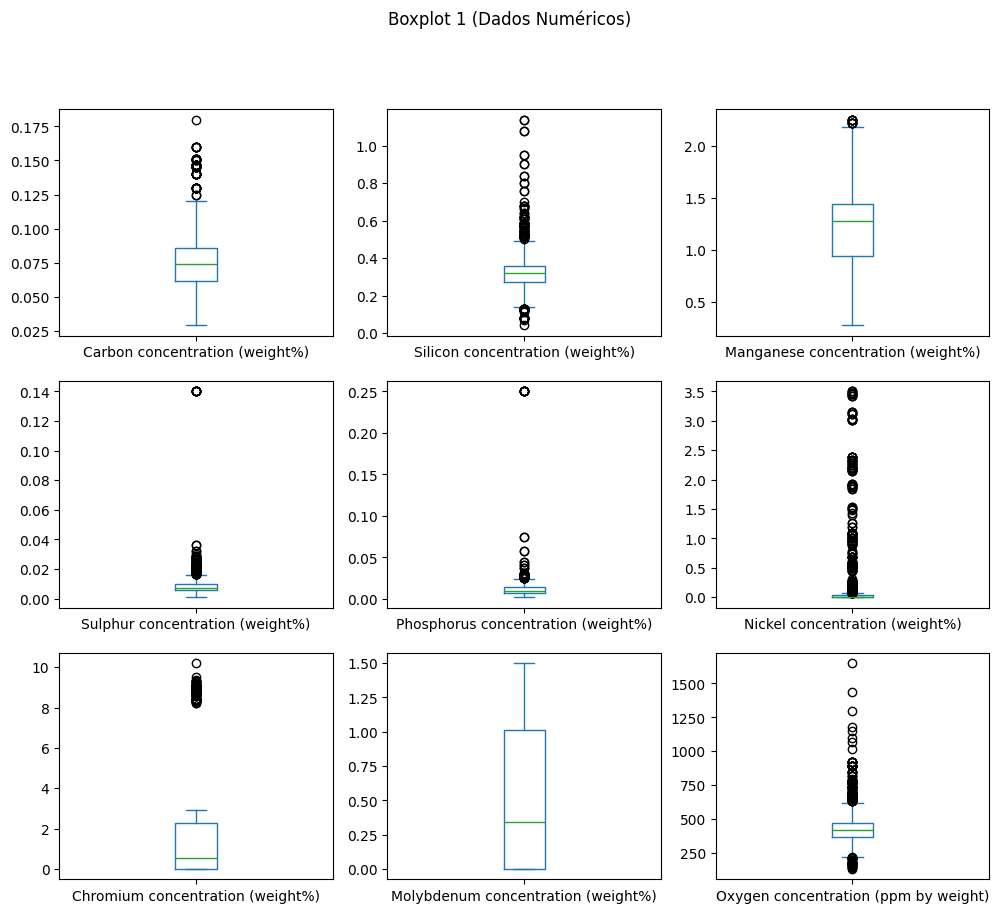

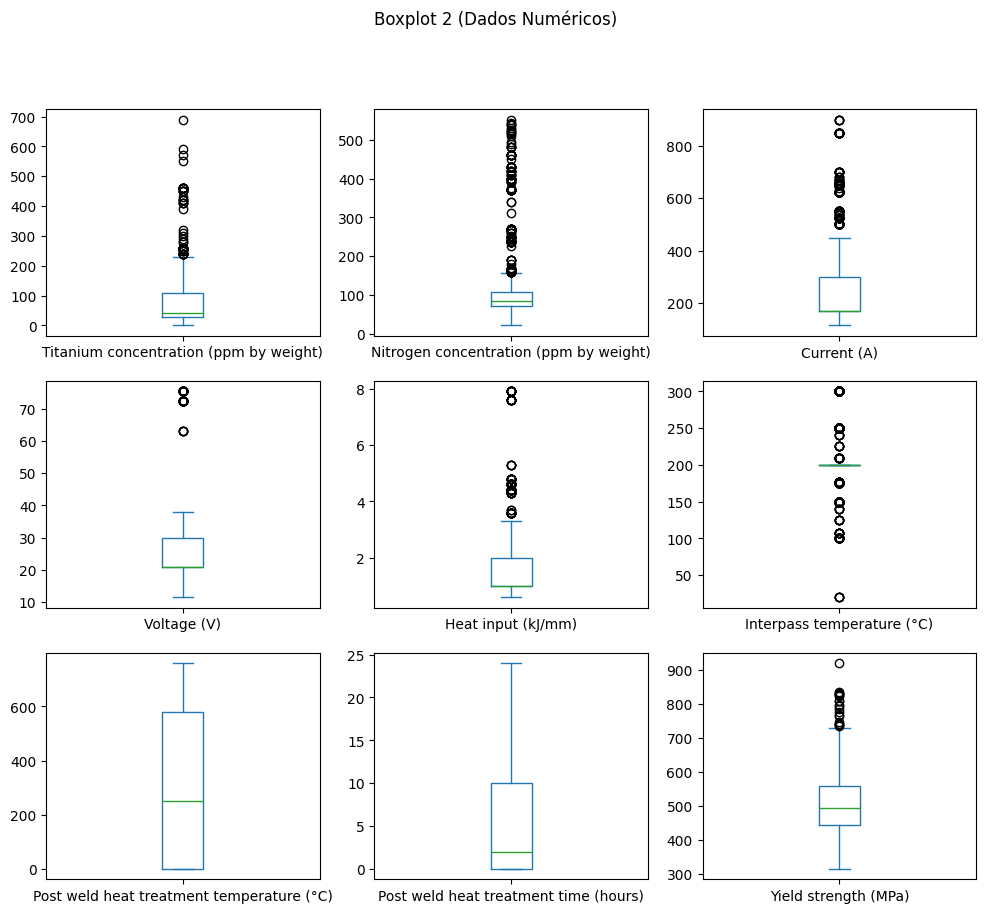

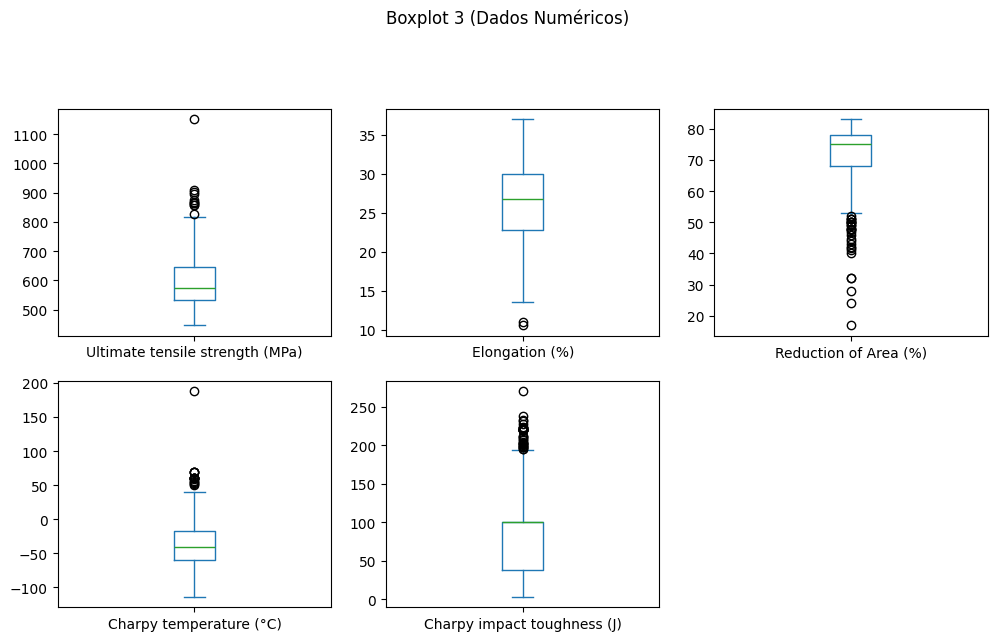

In [12]:
# Gerar boxplots em grupos
total_plots = math.ceil(num_columns / (cols_per_plot * rows_per_plot))  # Divide em grupos

for i in range(total_plots):
    start_col = i * (cols_per_plot * rows_per_plot)
    end_col = start_col + (cols_per_plot * rows_per_plot)
    
    data_subset = data_numeric.iloc[:, start_col:end_col]  # Seleciona um subset das colunas
    
    if not data_subset.empty:
        data_subset.plot(kind='box', subplots=True, layout=(rows_per_plot, cols_per_plot), figsize=(12, 10), sharex=False, sharey=False)
        plt.suptitle(f"Boxplot {i + 1} (Dados Numéricos)")
        plt.show()

Analisando melhor os outliers

In [13]:
# Inicializar um DataFrame para armazenar skewness, kurtosis e outliers
analysis = pd.DataFrame(index=data_numeric.columns, columns=['Skewness', 'Kurtosis', 'Outliers'])

# Loop sobre cada coluna numérica para calcular skewness, kurtosis e detectar outliers
for column in data_numeric.columns:
    # Calcular Skewness e Kurtosis
    skewness = data_numeric[column].skew()
    kurtosis = data_numeric[column].kurt()
    
    # Calcular Q1, Q3 e o IQR para cada coluna
    Q1 = data_numeric[column].quantile(0.25)
    Q3 = data_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Condição para identificar outliers na coluna
    outlier_condition = (data_numeric[column] < (Q1 - 1.5 * IQR)) | (data_numeric[column] > (Q3 + 1.5 * IQR))
    outliers = data_numeric[column][outlier_condition]
    
    # Armazenar os resultados no DataFrame de análise
    analysis.at[column, 'Skewness'] = skewness
    analysis.at[column, 'Kurtosis'] = kurtosis
    analysis.at[column, 'Outliers'] = len(outliers)  # Contar o número de outliers na coluna

# Exibir a análise completa
print("Análise completa de Skewness, Kurtosis e Outliers:")
analysis.style.format(precision=4)  


Análise completa de Skewness, Kurtosis e Outliers:


,Skewness,Kurtosis,Outliers
Carbon concentration (weight%),0.8331,1.3264,63
Silicon concentration (weight%),1.6240,8.1173,153
Manganese concentration (weight%),0.0841,-0.6267,11
Sulphur concentration (weight%),9.6780,108.9606,126
Phosphorus concentration (weight%),10.8510,128.1199,76
Nickel concentration (weight%),4.1064,17.3290,332
Chromium concentration (weight%),1.5466,0.9364,120
Molybdenum concentration (weight%),0.2666,-1.6875,0
Oxygen concentration (ppm by weight),1.9688,8.2465,156
Titanium concentration (ppm by weight),2.5486,7.3732,66


Variáveis como "Sulphur" e "Phosphorus concentration" possuem valores extremamente altos de Skewness e Kurtosis, indicando que seus dados têm distribuições altamente assimétricas e muitos outliers.


As variáveis como Sulphur e Phosphorus têm extrema assimetria e um número significativo de outliers, sugerindo que o tratamento desses valores pode ser necessário antes de análises estatísticas ou modelagem.
Elementos como Nickel e Oxygen também possuem um número elevado de outliers e alta assimetria.
Variáveis como Molybdenum e Post weld heat treatment temperature possuem distribuições mais estáveis, sem outliers.

In [16]:
from scipy import stats

# Loop para aplicar a análise em todas as colunas numéricas
for feature in numeric_features:
    if feature in data_clean.columns:  # Verificar se a coluna existe no DataFrame
        df_temp = data_clean[feature]
        df_temp = df_temp[df_temp.notna()]  # Remover valores NaN
        
        print(f"Analysis for the column: {feature}")
        
        # Teste de normalidade (Shapiro-Wilk)
        stat, p_value = stats.shapiro(df_temp)
        print(f'Shapiro-Wilk Test for {feature}: stat={stat:.3f}, p={p_value:.3f}')
        
        # Skewness e Kurtosis
        print(f'Skewness for {feature}:', df_temp.skew())
        print(f'Kurtosis for {feature}:', df_temp.kurt())
        print("\n" + "-"*50 + "\n")  # Separador entre colunas
    else:
        print(f"Column {feature} not found in data_clean")


Analysis for the column: Carbon concentration (weight%)
Shapiro-Wilk Test for Carbon concentration (weight%): stat=0.943, p=0.000
Skewness for Carbon concentration (weight%): 0.8330875639359343
Kurtosis for Carbon concentration (weight%): 1.3263842798265717

--------------------------------------------------

Analysis for the column: Silicon concentration (weight%)
Shapiro-Wilk Test for Silicon concentration (weight%): stat=0.894, p=0.000
Skewness for Silicon concentration (weight%): 1.6239557792674093
Kurtosis for Silicon concentration (weight%): 8.117286897023359

--------------------------------------------------

Analysis for the column: Manganese concentration (weight%)
Shapiro-Wilk Test for Manganese concentration (weight%): stat=0.973, p=0.000
Skewness for Manganese concentration (weight%): 0.0840610517935515
Kurtosis for Manganese concentration (weight%): -0.62668808524064

--------------------------------------------------

Analysis for the column: Sulphur concentration (weigh

log

In [17]:
log_columns = ['Silicon concentration (weight%)',
               'Sulphur concentration (weight%)',
               'Phosphorus concentration (weight%)',
               'Nickel concentration (weight%)',
               'Titanium concentration (ppm by weight)',
               'Nitrogen concentration (ppm by weight)',
               'Oxygen concentration (ppm by weight)',
               'Voltage (V)',
               'Heat input (kJ/mm)']

# Apply logarithmic transformation (log(x + 1)) to avoid issues with zero values
data_clean[log_columns] = data_clean[log_columns].apply(lambda x: np.log(x + 1))

# Check the result
data_clean[log_columns].head()

,Silicon concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Titanium concentration (ppm by weight),Nitrogen concentration (ppm by weight),Oxygen concentration (ppm by weight),Voltage (V),Heat input (kJ/mm)
0,0.262364,0.007968,0.011929,0.0,NaN,NaN,NaN,3.091042,0.693147
1,0.262364,0.007968,0.011929,0.0,NaN,NaN,NaN,3.091042,0.693147
2,0.262364,0.007968,0.011929,0.0,NaN,NaN,NaN,3.091042,0.693147
3,0.270027,0.006976,0.013903,0.0,NaN,NaN,NaN,3.091042,0.693147
4,0.270027,0.006976,0.013903,0.0,NaN,NaN,NaN,3.091042,0.693147


In [19]:
imputer_median = SimpleImputer(strategy = "median")
imputer_mode = SimpleImputer(strategy = "most_frequent")

data_imputed = data_clean.copy()

# Verificar se as colunas em concentration_features existem no DataFrame antes de tentar preenchê-las
concentration_features = [col for col in data_clean.columns if "concentration" in col and not("Phosphorus" in col or "Sulphur" in col)]
concentration_features = [col for col in concentration_features if col in data_imputed.columns]  # Verificar se existem no DataFrame

other_numeric_features = [col for col in numeric_features if col not in concentration_features]
other_numeric_features = [col for col in other_numeric_features if col in data_imputed.columns]  # Verificar se existem no DataFrame

# Preencher valores faltantes com zero para as colunas de concentração (exceto Phosphorus e Sulphur)
data_imputed[concentration_features] = data_imputed[concentration_features].fillna(0)

# Preencher valores faltantes com a mediana para outras colunas numéricas
data_imputed[other_numeric_features] = imputer_median.fit_transform(data_imputed[other_numeric_features])

# Preencher valores faltantes com a moda para colunas categóricas
data_imputed[categoric_features] = imputer_mode.fit_transform(data_imputed[categoric_features])


In [20]:
print("Number of missing values after imputing: ", data_imputed[data_imputed.isnull().any(axis=1)].shape[0])

Number of missing values after imputing:  0


Numerical features

In [23]:
# Remover duplicatas e criar uma versão do DataFrame
data_all = data_imputed.drop_duplicates(keep='last')  # Remover duplicatas

# Reordenar colunas para melhor visualização
cols = numeric_features.tolist()

# Verificar se as colunas realmente existem no DataFrame após a remoção de duplicatas
existing_cols = [col for col in cols if col in data_all.columns]

# Selecionar apenas as colunas existentes
data_numeric = data_all[existing_cols]

# Exibir as estatísticas descritivas das colunas numéricas
data_numeric.describe()


,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Oxygen concentration (ppm by weight),Titanium concentration (ppm by weight),...,Heat input (kJ/mm),Interpass temperature (°C),Post weld heat treatment temperature (°C),Post weld heat treatment time (hours),Yield strength (MPa),Ultimate tensile strength (MPa),Elongation (%),Reduction of Area (%),Charpy temperature (°C),Charpy impact toughness (J)
count,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,...,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000
mean,0.075521,0.280748,1.202821,0.009458,0.012705,0.105764,0.997214,0.230002,4.596291,1.977387,...,0.915377,204.789952,304.243947,5.025654,501.401090,583.937107,26.577845,73.634322,-37.130145,93.449758
std,0.023898,0.080951,0.382137,0.010550,0.017572,0.282844,2.333634,0.408268,2.595495,2.090802,...,0.361766,39.099712,284.412831,6.077966,64.147779,59.960597,3.196226,6.040234,25.475621,37.060290
min,0.029000,0.039221,0.270000,0.001000,0.001998,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.470004,20.000000,0.000000,0.000000,315.000000,447.000000,10.600000,17.000000,-114.000000,3.000000
25%,0.061750,0.239017,0.940000,0.005982,0.006976,0.000000,0.000000,0.000000,5.173309,0.000000,...,0.693147,200.000000,0.000000,0.000000,495.000000,575.500000,26.800000,75.000000,-42.000000,100.000000
50%,0.074000,0.277632,1.270000,0.006976,0.009950,0.000000,0.000000,0.000000,5.993961,1.791759,...,0.693147,200.000000,250.000000,2.000000,495.000000,575.500000,26.800000,75.000000,-40.000000,100.000000
75%,0.086000,0.307485,1.440000,0.009950,0.013903,0.029559,0.402500,0.270000,6.118097,3.761200,...,1.098612,200.000000,580.000000,10.000000,495.000000,575.500000,26.800000,75.000000,-40.000000,100.000000
max,0.180000,0.760806,2.250000,0.131028,0.223144,1.504077,10.200000,1.500000,7.409136,6.538140,...,2.186051,300.000000,760.000000,24.000000,920.000000,1151.000000,37.000000,83.000000,188.000000,270.000000


Correlacao

In [24]:
data_numeric.corr().style.background_gradient(cmap="coolwarm")

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Oxygen concentration (ppm by weight),Titanium concentration (ppm by weight),Nitrogen concentration (ppm by weight),Current (A),Voltage (V),Heat input (kJ/mm),Interpass temperature (°C),Post weld heat treatment temperature (°C),Post weld heat treatment time (hours),Yield strength (MPa),Ultimate tensile strength (MPa),Elongation (%),Reduction of Area (%),Charpy temperature (°C),Charpy impact toughness (J)
Carbon concentration (weight%),1.000000,-0.098334,0.062385,0.030931,-0.007477,-0.187183,0.163941,0.138725,0.076768,0.031967,0.130923,0.361702,0.243095,0.283456,0.251903,0.106986,-0.089344,0.130874,0.165488,-0.150000,-0.267802,0.022864,-0.018673
Silicon concentration (weight%),-0.098334,1.000000,0.203856,-0.062776,-0.050091,-0.088490,-0.176624,-0.317440,0.027151,0.287478,-0.065119,-0.114996,-0.208497,-0.144775,0.151356,-0.228944,-0.226386,0.028821,0.016703,0.079134,-0.054235,-0.091564,-0.000120
Manganese concentration (weight%),0.062385,0.203856,1.000000,0.016847,0.041204,-0.100849,-0.269014,-0.324852,0.037598,0.182457,0.024937,0.054168,0.035239,0.052390,0.056506,-0.311673,-0.218459,0.151414,0.144045,-0.018545,-0.073824,-0.036208,-0.034823
Sulphur concentration (weight%),0.030931,-0.062776,0.016847,1.000000,0.934605,0.013045,-0.020003,0.159362,0.030002,-0.135645,0.079537,0.221230,0.283706,0.280081,0.015578,0.058553,-0.020625,0.039077,0.048184,-0.077583,-0.202534,0.143030,-0.082887
Phosphorus concentration (weight%),-0.007477,-0.050091,0.041204,0.934605,1.000000,0.043970,0.038364,0.171276,-0.012063,-0.165445,0.087037,0.159947,0.203944,0.223561,-0.067421,0.078304,-0.016858,0.068665,0.062940,-0.075105,-0.157648,0.144067,-0.093964
Nickel concentration (weight%),-0.187183,-0.088490,-0.100849,0.013045,0.043970,1.000000,0.081454,0.060887,-0.062600,-0.081003,-0.031650,-0.010735,-0.046385,0.009220,-0.111760,0.034405,0.091964,0.192984,0.177850,-0.088381,-0.088962,-0.003633,-0.058789
Chromium concentration (weight%),0.163941,-0.176624,-0.269014,-0.020003,0.038364,0.081454,1.000000,0.717526,0.120641,-0.324529,0.278371,-0.056406,0.114534,-0.059615,-0.118898,0.528335,0.129474,0.219681,0.237610,-0.235097,-0.124564,0.201543,-0.060236
Molybdenum concentration (weight%),0.138725,-0.317440,-0.324852,0.159362,0.171276,0.060887,0.717526,1.000000,0.161670,-0.409415,0.170772,0.124350,0.241241,0.150770,-0.109469,0.619546,0.258345,0.228938,0.266020,-0.258317,-0.160841,0.247350,-0.059908
Oxygen concentration (ppm by weight),0.076768,0.027151,0.037598,0.030002,-0.012063,-0.062600,0.120641,0.161670,1.000000,0.333107,0.684559,0.032008,0.163090,0.041908,-0.090393,-0.126373,0.077098,-0.029787,0.026765,-0.106437,-0.001442,-0.040935,-0.199819
Titanium concentration (ppm by weight),0.031967,0.287478,0.182457,-0.135645,-0.165445,-0.081003,-0.324529,-0.409415,0.333107,1.000000,0.269538,-0.155035,-0.303668,-0.186451,0.205190,-0.449712,-0.108150,0.018387,-0.021676,-0.002470,-0.008244,-0.198275,-0.001082


- Sulphur concentration and Phosphorus concentration are highly correlated, then we must keep only one of them.
- Chromium, Molybdenum and Vanadium concentration are highly correlated, then we must keep only one of them.
- Elongation (%) and Reduction of Area (%) are highly correlated, then we must keep only one of them.
- Reduction of Area (%) are highly correlated with the target variables Yield strenght and Ultimate tensile strenght, then we must keep it on the prediction!!
- Yield strenght and Ultimate tensile strenght are highly correlated, then we should keep the Yield strenght on the prediction of the Ultimate tensile strenght !!

In [25]:
corr = data_numeric.corr()
corr_unstack = corr.unstack()

# Filter the diagonal (correlations of 1) and sort by absolute values
sorted_correlation_pairs = corr_unstack[corr_unstack != 1].abs().sort_values(ascending=False)

most_corr_pairs = sorted_correlation_pairs[sorted_correlation_pairs > 0.75]

# Print the most correlated pairs
print(most_corr_pairs.iloc[[i for i in range(0,len(most_corr_pairs),2)]])

Phosphorus concentration (weight%)  Sulphur concentration (weight%)    0.934605
Current (A)                         Heat input (kJ/mm)                 0.890313
Ultimate tensile strength (MPa)     Yield strength (MPa)               0.790294
dtype: float64


In [27]:
corr["Yield strength (MPa)"].sort_values(ascending=False).head(10)


Yield strength (MPa)                         1.000000
Ultimate tensile strength (MPa)              0.790294
Molybdenum concentration (weight%)           0.228938
Chromium concentration (weight%)             0.219681
Nickel concentration (weight%)               0.192984
Manganese concentration (weight%)            0.151414
Carbon concentration (weight%)               0.130874
Current (A)                                  0.089563
Post weld heat treatment temperature (°C)    0.083310
Heat input (kJ/mm)                           0.081559
Name: Yield strength (MPa), dtype: float64

In [28]:
corr["Ultimate tensile strength (MPa)"].sort_values(ascending=False).head(10)

Ultimate tensile strength (MPa)              1.000000
Yield strength (MPa)                         0.790294
Molybdenum concentration (weight%)           0.266020
Chromium concentration (weight%)             0.237610
Nickel concentration (weight%)               0.177850
Carbon concentration (weight%)               0.165488
Manganese concentration (weight%)            0.144045
Post weld heat treatment temperature (°C)    0.119095
Heat input (kJ/mm)                           0.111188
Current (A)                                  0.102254
Name: Ultimate tensile strength (MPa), dtype: float64

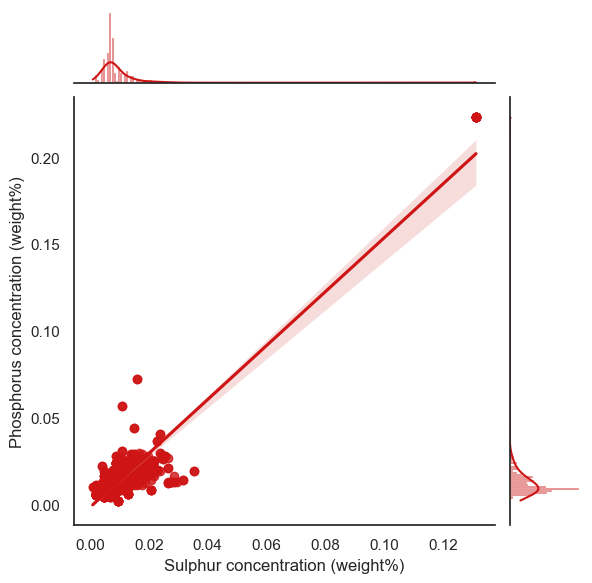

In [32]:
sns.jointplot(data = data_numeric, x = "Sulphur concentration (weight%)",y = "Phosphorus concentration (weight%)", kind="reg", color="#ce1414")

Categorical features

C:\Users\Edison Araki\AppData\Local\Temp\ipykernel_12352\2437880142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].replace([0, '0'], '0')
C:\Users\Edison Araki\AppData\Local\Temp\ipykernel_12352\2437880142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].astype("category")


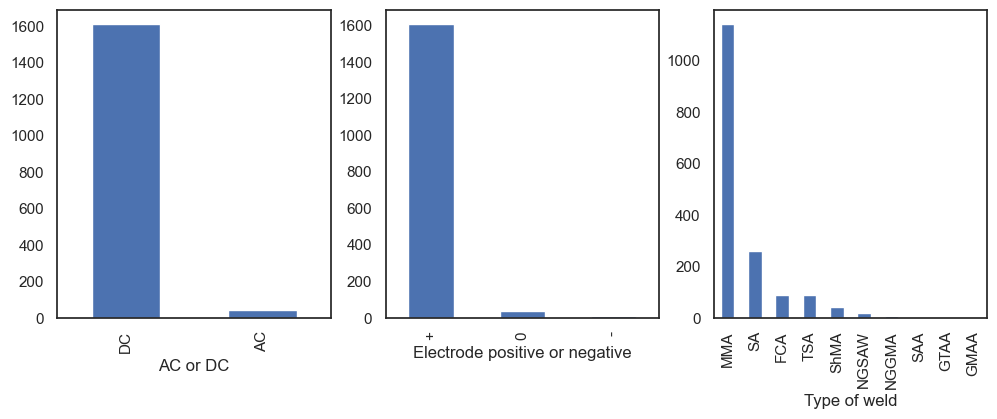

In [36]:
data_categoric = data_all[categoric_features]
data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].replace([0, '0'], '0')
data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].astype("category")

fig, axs = plt.subplots(1, 3, figsize = (12,4))

for ax, col in zip(axs.flatten(), categoric_features):
    data_categoric[col].value_counts().plot(ax = ax, kind = 'bar')
    
plt.tight_layout
plt.show()

C:\Users\Edison Araki\AppData\Local\Temp\ipykernel_12352\1931736134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categoric['AC or DC'] = data_categoric['AC or DC'].astype(str)
C:\Users\Edison Araki\AppData\Local\Temp\ipykernel_12352\1931736134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categoric['Electrode positive or negative'] = data_categoric['Electrode positive or negative'].astype(str)
C:\Users\Edison Araki\AppData\Local\Temp\ipykernel_12352\1931736134.py:7: SettingWithCopyWar

AC or DC
DC    1610
AC      42
Name: count, dtype: int64
Electrode positive or negative
+    1607
0      38
-       7
Name: count, dtype: int64
Type of weld
MMA      1140
SA        261
FCA        87
TSA        87
ShMA       40
NGSAW      18
NGGMA       7
SAA         4
GTAA        4
GMAA        4
Name: count, dtype: int64


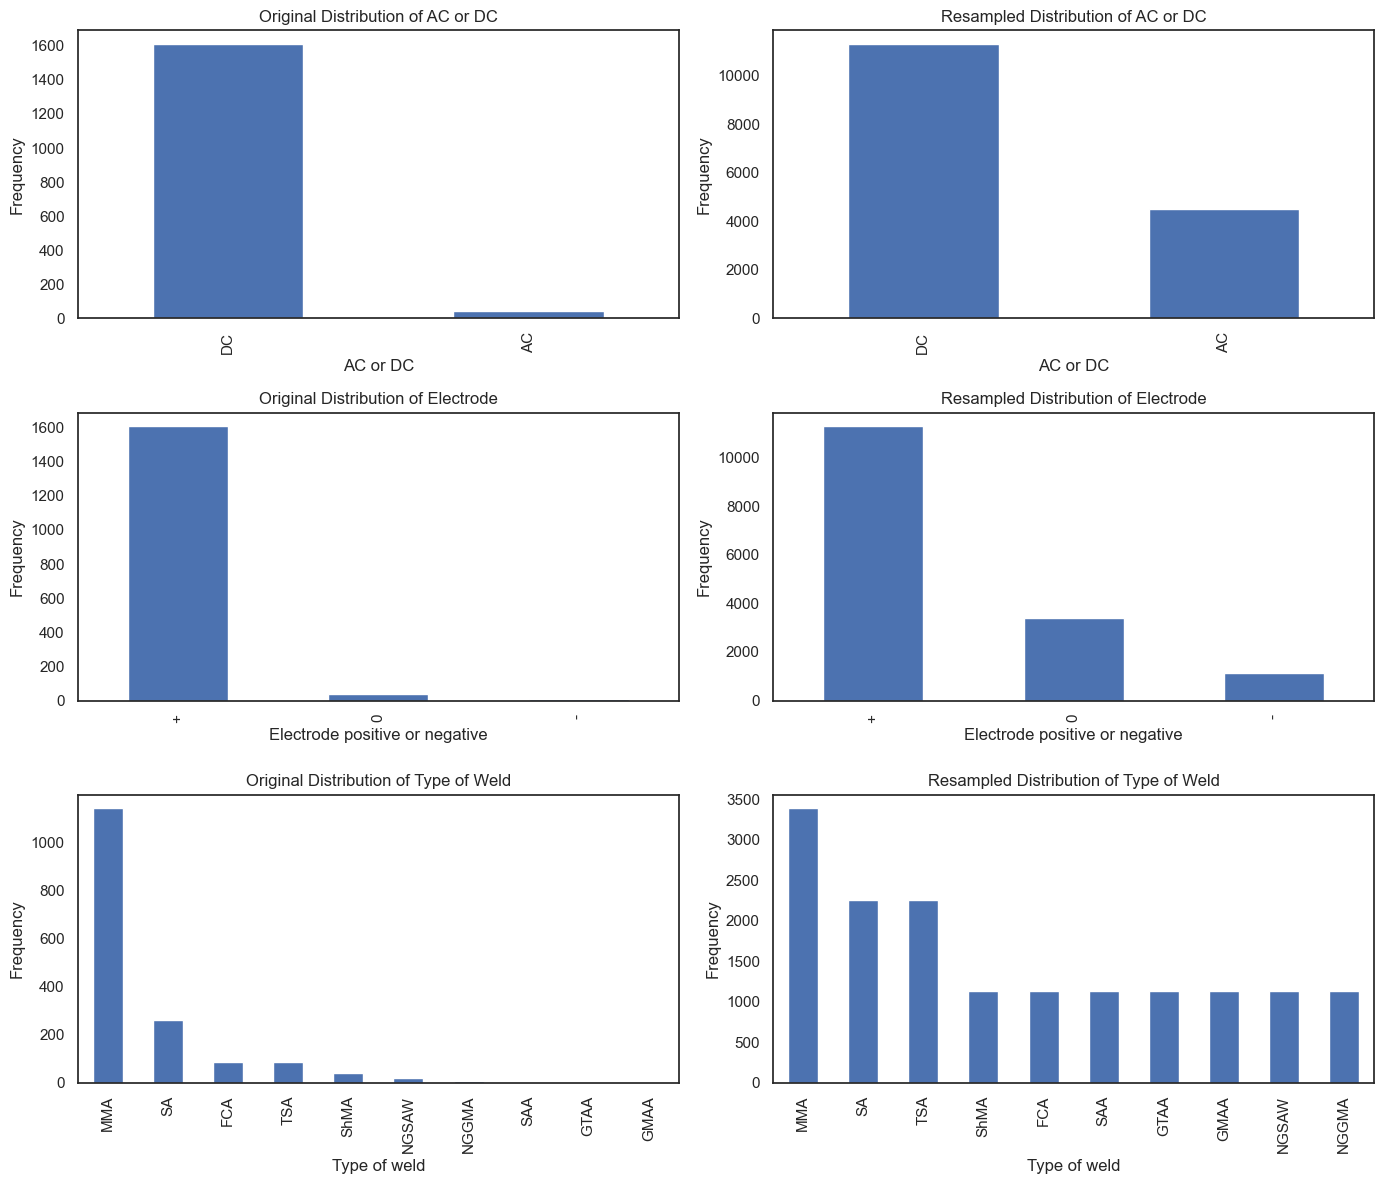

In [37]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Convert all values in the categorical columns to strings
data_categoric['AC or DC'] = data_categoric['AC or DC'].astype(str)
data_categoric['Electrode positive or negative'] = data_categoric['Electrode positive or negative'].astype(str)
data_categoric['Type of weld'] = data_categoric['Type of weld'].astype(str)

# Check distribution of each column (optional)
print(data_categoric['AC or DC'].value_counts())
print(data_categoric['Electrode positive or negative'].value_counts())
print(data_categoric['Type of weld'].value_counts())

# Combine the three columns into a single target variable (if you want to oversample based on all combinations)
data_categoric['Combined'] = data_categoric['AC or DC'] + '_' + data_categoric['Electrode positive or negative'] + '_' + data_categoric['Type of weld']

# Set the target (you can choose 'AC or DC', 'Electrode positive or negative', or 'Combined')
y = data_categoric['Combined']  # using the combination of all three

# Encode the features using OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(data_categoric[['AC or DC', 'Electrode positive or negative', 'Type of weld']]).toarray()

# Set k_neighbors for SMOTENC (adjust for small classes)
smote = SMOTENC(categorical_features=[0, 1, 2], random_state=42, k_neighbors=2)

# Applying SMOTENC for oversampling
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Create a DataFrame for the resampled data
resampled_df = pd.DataFrame(encoder.inverse_transform(X_resampled), columns=['AC or DC', 'Electrode positive or negative', 'Type of weld'])

# Create subplots for 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3 rows, 2 columns

# Define the column names and corresponding titles for original and resampled data
columns = ['AC or DC', 'Electrode positive or negative', 'Type of weld']
titles = ['AC or DC', 'Electrode', 'Type of Weld']

# Plotting for each category
for i, col in enumerate(columns):
    # Plot original data
    data_categoric[col].value_counts().plot(kind='bar', ax=axes[i, 0])
    axes[i, 0].set_title(f'Original Distribution of {titles[i]}')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_xlabel(col)

    # Plot resampled data
    resampled_df[col].value_counts().plot(kind='bar', ax=axes[i, 1])
    axes[i, 1].set_title(f'Resampled Distribution of {titles[i]}')
    axes[i, 1].set_ylabel('Frequency')
    axes[i, 1].set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


C:\Users\Edison Araki\AppData\Local\Temp\ipykernel_12352\2248912136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categoric['AC or DC'] = data_categoric['AC or DC'].astype(str)
C:\Users\Edison Araki\AppData\Local\Temp\ipykernel_12352\2248912136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categoric['Electrode positive or negative'] = data_categoric['Electrode positive or negative'].astype(str)
C:\Users\Edison Araki\AppData\Local\Temp\ipykernel_12352\2248912136.py:9: SettingWithCopyWar

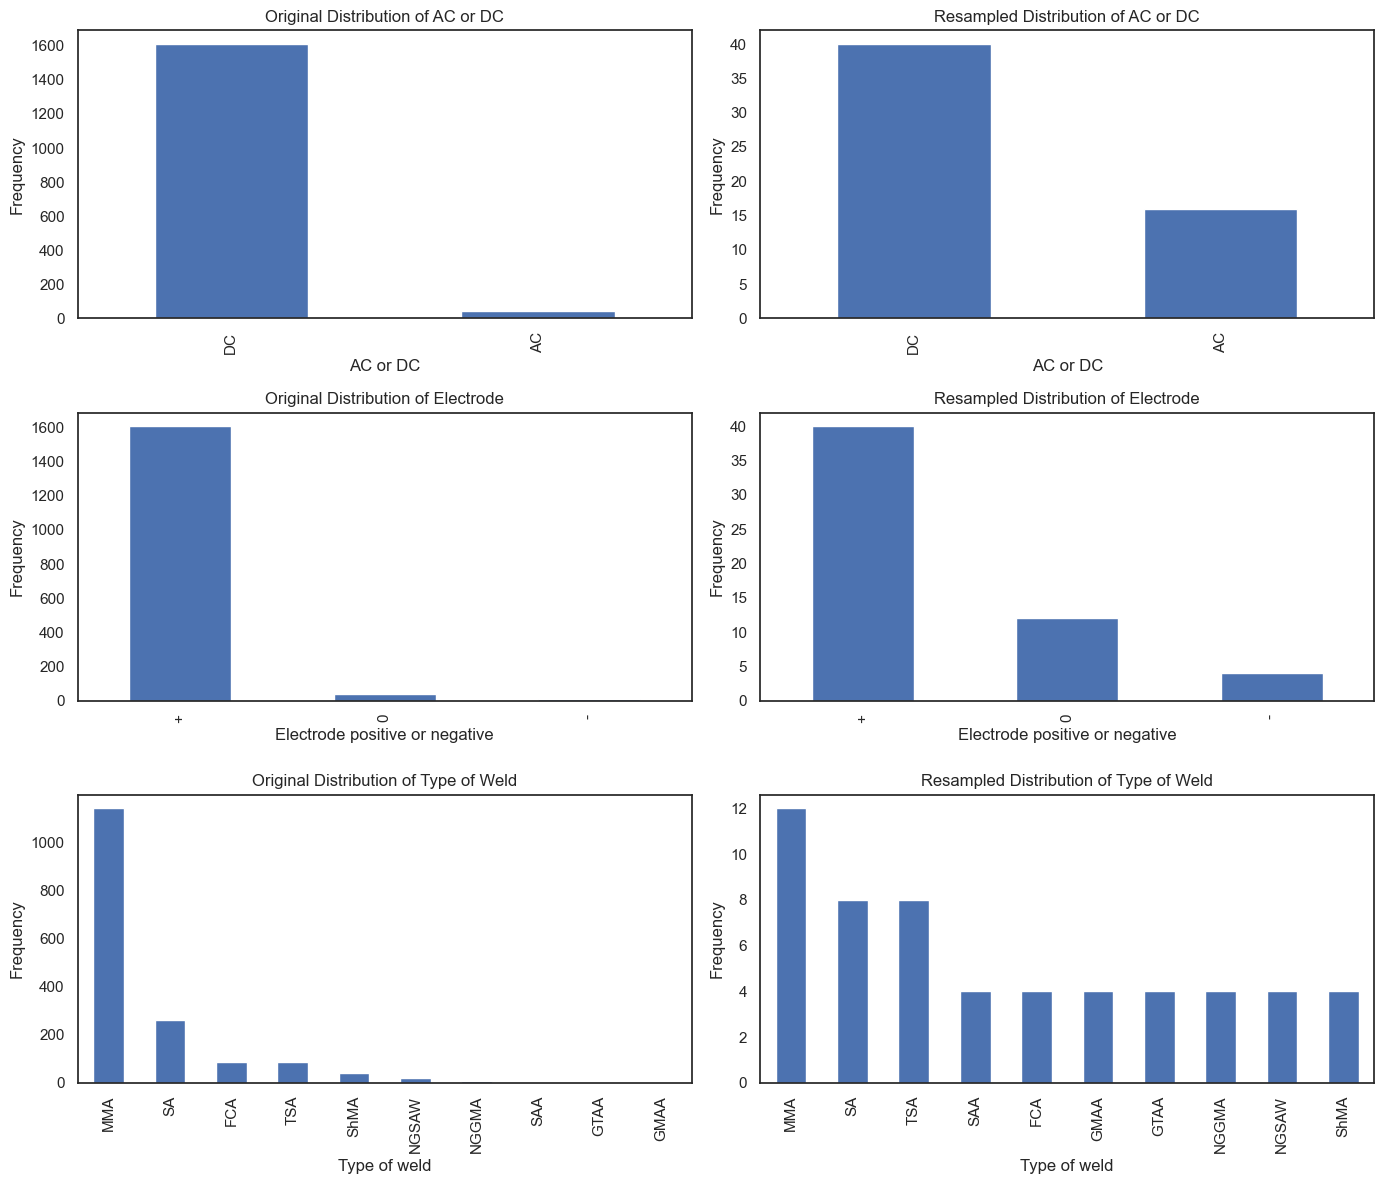

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Convert all values in the categorical columns to strings
data_categoric['AC or DC'] = data_categoric['AC or DC'].astype(str)
data_categoric['Electrode positive or negative'] = data_categoric['Electrode positive or negative'].astype(str)
data_categoric['Type of weld'] = data_categoric['Type of weld'].astype(str)

# Combine the three columns into a single target variable (if you want to undersample based on all combinations)
data_categoric['Combined'] = data_categoric['AC or DC'] + '_' + data_categoric['Electrode positive or negative'] + '_' + data_categoric['Type of weld']

# Set the target (you can choose 'AC or DC', 'Electrode positive or negative', or 'Combined')
y = data_categoric['Combined']  # using the combination of all three

# Encode the features using OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(data_categoric[['AC or DC', 'Electrode positive or negative', 'Type of weld']]).toarray()

# Apply RandomUnderSampler for undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_encoded, y)

# Convert back to original categories for X
resampled_X = pd.DataFrame(encoder.inverse_transform(X_resampled), columns=['AC or DC', 'Electrode positive or negative', 'Type of weld'])

# Convert back to original categories for y
resampled_df = resampled_X.copy()
resampled_df['Combined'] = y_resampled

# Create subplots for 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3 rows, 2 columns

# Define the column names and corresponding titles for original and resampled data
columns = ['AC or DC', 'Electrode positive or negative', 'Type of weld']
titles = ['AC or DC', 'Electrode', 'Type of Weld']

# Plotting for each category
for i, col in enumerate(columns):
    # Plot original data
    data_categoric[col].value_counts().plot(kind='bar', ax=axes[i, 0])
    axes[i, 0].set_title(f'Original Distribution of {titles[i]}')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_xlabel(col)

    # Plot resampled data
    resampled_df[col].value_counts().plot(kind='bar', ax=axes[i, 1])
    axes[i, 1].set_title(f'Resampled Distribution of {titles[i]}')
    axes[i, 1].set_ylabel('Frequency')
    axes[i, 1].set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Target variables

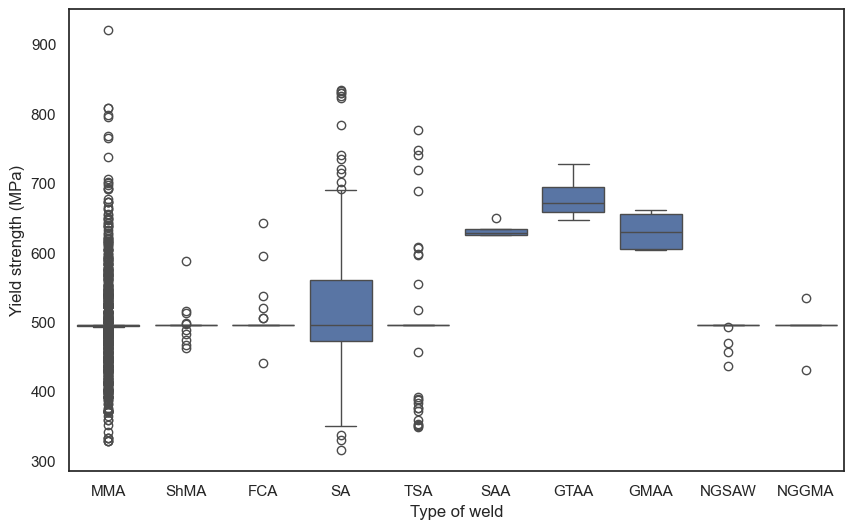

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data_all, x = "Type of weld", y = "Yield strength (MPa)")
plt.show()

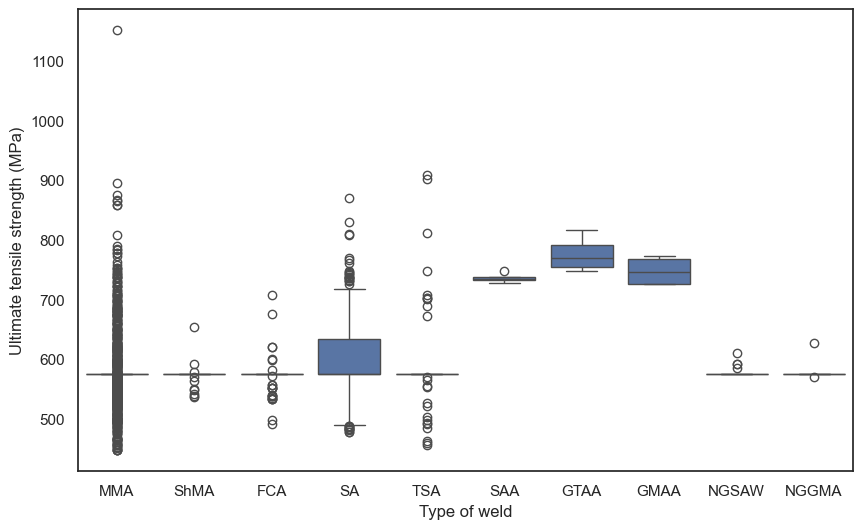

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data_all, x = "Type of weld", y = "Ultimate tensile strength (MPa)")
plt.show()